In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set()

### Read and filter data

In [3]:
# Get Covid Stringency Index data
stringency = pd.read_csv('covid-stringency-index.csv')
fin_strin = stringency[stringency['Entity'] == 'Finland']
fin_strin = fin_strin.drop(['Entity', 'Code'], axis=1)
fin_strin['Day'] = pd.to_datetime(fin_strin['Day'], format='%Y-%m-%d') 
start = fin_strin.iloc[0]['Day']
end = fin_strin.iloc[-1]['Day']
print(end)

#Get Finland covid data
global_covid = pd.read_csv('WHO-COVID-19-global-data.csv')
fin_covid = global_covid[global_covid['Country'] == 'Finland']
fin_covid = fin_covid.drop(['Country_code', 'Country', 'WHO_region', 'Cumulative_cases','Cumulative_deaths'], axis=1)
fin_covid['Date_reported'] = pd.to_datetime(fin_covid['Date_reported'], format='%Y-%m-%d' )

# Filter data and combine data
mask = (fin_covid['Date_reported'] >= start) & (fin_covid['Date_reported'] <= end)
fin_covid = fin_covid.loc[mask]

## Insert this to  col 2
strin_values = fin_strin.loc[:, 'stringency_index'].to_numpy()
days = [i for i in range(fin_covid.shape[0])]
fin_covid.insert(0, 'Day', days)
fin_covid.insert(1, 'Stringency_index', strin_values)

# Final datapoint
fin_covid = fin_covid.drop(['Date_reported'], axis=1)

print("\n", fin_covid.describe())
fin_covid.tail()


2022-02-03 00:00:00

               Day  Stringency_index     New_cases  New_deaths
count  745.000000        745.000000    745.000000  745.000000
mean   372.000000         42.054577    688.618792    2.761074
std    215.207264         13.774678   1612.838820    3.725001
min      0.000000          0.000000      0.000000    0.000000
25%    186.000000         34.720000     58.000000    0.000000
50%    372.000000         40.740000    237.000000    1.000000
75%    558.000000         52.310000    522.000000    4.000000
max    744.000000         71.300000  10549.000000   20.000000


,Day,Stringency_index,New_cases,New_deaths
55002,740,43.06,3933,1
55003,741,43.06,4140,0
55004,742,41.67,8119,0
55005,743,41.67,6577,0
55006,744,41.67,4243,1


### Plotting data

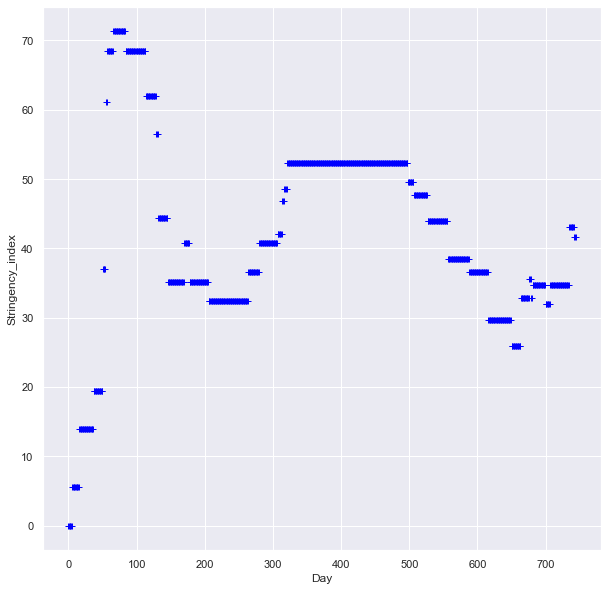

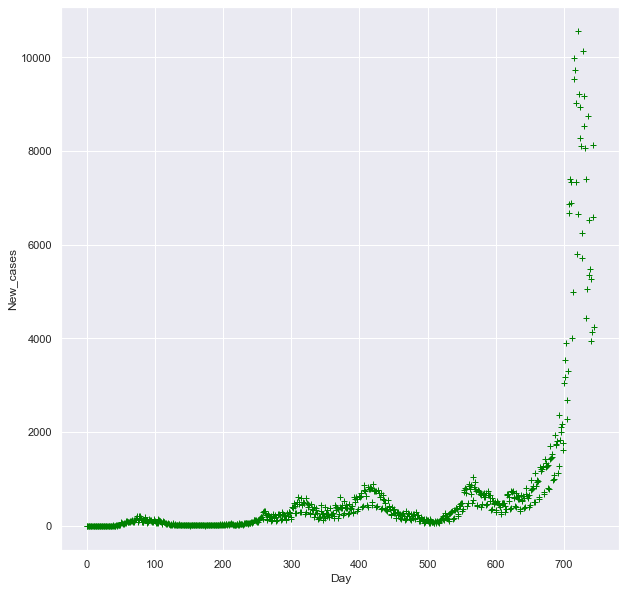

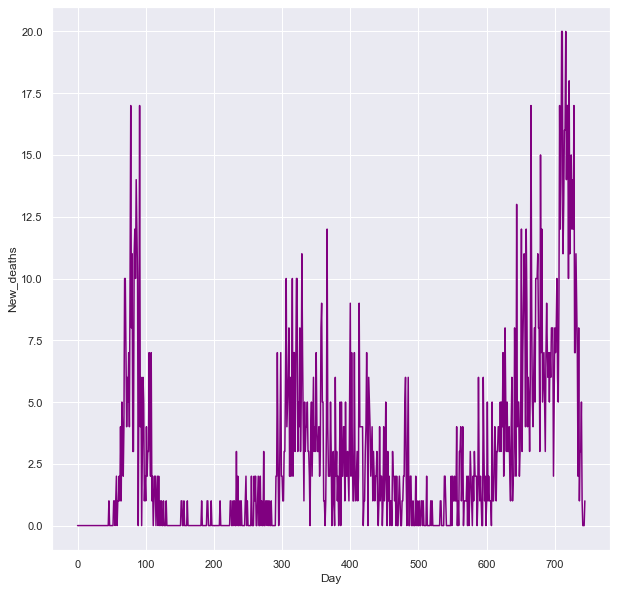

In [4]:
fig1= plt.figure(1, figsize=(10,10))
plt.xlabel('Day')
plt.ylabel('Stringency_index')
plt.plot(fin_covid['Day'], fin_covid['Stringency_index'], '+', color='blue')
plt.show()

fig2 = plt.figure(2, figsize=(10,10))
plt.xlabel('Day')
plt.ylabel('New_cases')
plt.plot(fin_covid['Day'], fin_covid['New_cases'], '+', color='green')
plt.show() 

fig3 = plt.figure(3, figsize=(10,10))
plt.xlabel('Day')
plt.ylabel('New_deaths')
plt.plot(fin_covid['Day'], fin_covid['New_deaths'], color='purple')
plt.show()


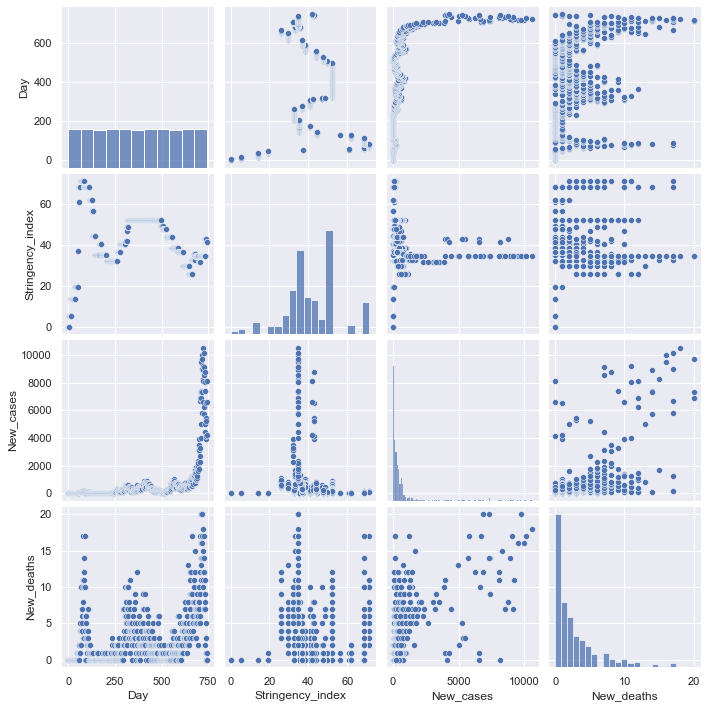

In [5]:
sns.pairplot(fin_covid)

### Model and model validation

In [20]:
# Set features(x) and label(y)
X = fin_covid.drop(['New_deaths'], axis=1)
y = fin_covid['New_deaths']

# Split the dataset into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

Ln = LinearRegression()
Ln.fit(X_train, y_train)
y_pred_train = Ln.predict(X_train)
tr_error = mean_squared_error(y_train, y_pred_train)

y_pred_val = Ln.predict(X_val)
val_error = mean_squared_error(y_val, y_pred_val)
print(f'Training error: {tr_error} Validation error: {val_error}')

Training error: 8.357635080808127 Validation error: 8.062371736047394
